## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  83.985097  1125.173145  0.091763  2.325748  0.948834
1  69.600038  1659.903793  0.849168  8.888328  1.546357
2  31.678034   744.049588  0.351386  5.405259  1.475398
3  30.735930   235.397119  0.856436  8.873808  1.347526
4  74.309190  1463.581378  0.419080  3.486067  1.335989


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.28857 | train_mse: 3.79509 | train_mae: 1.43944 |  0:00:00s
epoch 1  | loss: 0.51442 | train_mse: 1.89481 | train_mae: 1.07001 |  0:00:00s
epoch 2  | loss: 0.46032 | train_mse: 1.76748 | train_mae: 0.93734 |  0:00:00s


epoch 3  | loss: 0.42556 | train_mse: 1.31247 | train_mae: 0.82071 |  0:00:00s
epoch 4  | loss: 0.35088 | train_mse: 0.95241 | train_mae: 0.72326 |  0:00:00s
epoch 5  | loss: 0.29544 | train_mse: 0.61029 | train_mae: 0.59848 |  0:00:00s


epoch 6  | loss: 0.38754 | train_mse: 0.46854 | train_mae: 0.53224 |  0:00:00s
epoch 7  | loss: 0.35352 | train_mse: 0.4645  | train_mae: 0.54963 |  0:00:00s
epoch 8  | loss: 0.26581 | train_mse: 0.55169 | train_mae: 0.58474 |  0:00:00s


epoch 9  | loss: 0.2297  | train_mse: 0.46049 | train_mae: 0.53239 |  0:00:01s
epoch 10 | loss: 0.30244 | train_mse: 0.53905 | train_mae: 0.52372 |  0:00:01s


epoch 11 | loss: 0.24466 | train_mse: 0.5162  | train_mae: 0.53304 |  0:00:01s
epoch 12 | loss: 0.26604 | train_mse: 0.45292 | train_mae: 0.49094 |  0:00:01s
epoch 13 | loss: 0.47184 | train_mse: 0.38316 | train_mae: 0.43029 |  0:00:01s


epoch 14 | loss: 0.27168 | train_mse: 0.37186 | train_mae: 0.42588 |  0:00:01s
epoch 15 | loss: 0.31613 | train_mse: 0.40505 | train_mae: 0.45125 |  0:00:01s
epoch 16 | loss: 0.26622 | train_mse: 0.32706 | train_mae: 0.41091 |  0:00:01s


epoch 17 | loss: 0.21675 | train_mse: 0.25174 | train_mae: 0.38081 |  0:00:01s
epoch 18 | loss: 0.23644 | train_mse: 0.22969 | train_mae: 0.36839 |  0:00:01s
epoch 19 | loss: 0.25843 | train_mse: 0.19736 | train_mae: 0.33775 |  0:00:01s


epoch 20 | loss: 0.269   | train_mse: 0.15931 | train_mae: 0.29742 |  0:00:02s
epoch 21 | loss: 0.2132  | train_mse: 0.16638 | train_mae: 0.30486 |  0:00:02s
epoch 22 | loss: 0.21129 | train_mse: 0.18653 | train_mae: 0.3287  |  0:00:02s


epoch 23 | loss: 0.19078 | train_mse: 0.21234 | train_mae: 0.35378 |  0:00:02s
epoch 24 | loss: 0.24821 | train_mse: 0.24225 | train_mae: 0.38759 |  0:00:02s


epoch 25 | loss: 0.26216 | train_mse: 0.2125  | train_mae: 0.36615 |  0:00:02s
epoch 26 | loss: 0.1817  | train_mse: 0.1837  | train_mae: 0.3365  |  0:00:02s
epoch 27 | loss: 0.18081 | train_mse: 0.15183 | train_mae: 0.3011  |  0:00:02s


epoch 28 | loss: 0.19459 | train_mse: 0.17609 | train_mae: 0.32244 |  0:00:02s
epoch 29 | loss: 0.17015 | train_mse: 0.15791 | train_mae: 0.30209 |  0:00:02s
epoch 30 | loss: 0.13665 | train_mse: 0.14744 | train_mae: 0.29779 |  0:00:02s


epoch 31 | loss: 0.24778 | train_mse: 0.15484 | train_mae: 0.31298 |  0:00:03s
epoch 32 | loss: 0.16098 | train_mse: 0.14188 | train_mae: 0.29954 |  0:00:03s


epoch 33 | loss: 0.18326 | train_mse: 0.13525 | train_mae: 0.28971 |  0:00:03s
epoch 34 | loss: 0.22759 | train_mse: 0.13918 | train_mae: 0.28736 |  0:00:03s
epoch 35 | loss: 0.14919 | train_mse: 0.13193 | train_mae: 0.27731 |  0:00:03s


epoch 36 | loss: 0.14927 | train_mse: 0.11938 | train_mae: 0.26801 |  0:00:03s
epoch 37 | loss: 0.18842 | train_mse: 0.13528 | train_mae: 0.2844  |  0:00:03s
epoch 38 | loss: 0.16009 | train_mse: 0.11267 | train_mae: 0.25793 |  0:00:03s


epoch 39 | loss: 0.24986 | train_mse: 0.10972 | train_mae: 0.24731 |  0:00:03s
epoch 40 | loss: 0.21062 | train_mse: 0.11297 | train_mae: 0.25822 |  0:00:03s
epoch 41 | loss: 0.21482 | train_mse: 0.10849 | train_mae: 0.25428 |  0:00:04s


epoch 42 | loss: 0.19747 | train_mse: 0.11159 | train_mae: 0.253   |  0:00:04s
epoch 43 | loss: 0.12874 | train_mse: 0.11158 | train_mae: 0.26194 |  0:00:04s
epoch 44 | loss: 0.15452 | train_mse: 0.14563 | train_mae: 0.2995  |  0:00:04s


epoch 45 | loss: 0.13812 | train_mse: 0.15997 | train_mae: 0.30733 |  0:00:04s
epoch 46 | loss: 0.18712 | train_mse: 0.13514 | train_mae: 0.29057 |  0:00:04s
epoch 47 | loss: 0.17855 | train_mse: 0.14003 | train_mae: 0.28943 |  0:00:04s


epoch 48 | loss: 0.16145 | train_mse: 0.12133 | train_mae: 0.2687  |  0:00:04s
epoch 49 | loss: 0.17697 | train_mse: 0.12966 | train_mae: 0.27495 |  0:00:04s
epoch 50 | loss: 0.14293 | train_mse: 0.12189 | train_mae: 0.26705 |  0:00:04s


epoch 51 | loss: 0.15924 | train_mse: 0.12903 | train_mae: 0.27534 |  0:00:04s
epoch 52 | loss: 0.23759 | train_mse: 0.13543 | train_mae: 0.28052 |  0:00:04s
epoch 53 | loss: 0.13481 | train_mse: 0.13318 | train_mae: 0.27539 |  0:00:05s


epoch 54 | loss: 0.17878 | train_mse: 0.13365 | train_mae: 0.27305 |  0:00:05s
epoch 55 | loss: 0.2298  | train_mse: 0.14977 | train_mae: 0.29183 |  0:00:05s
epoch 56 | loss: 0.18297 | train_mse: 0.13533 | train_mae: 0.27891 |  0:00:05s


epoch 57 | loss: 0.1687  | train_mse: 0.1316  | train_mae: 0.27266 |  0:00:05s
epoch 58 | loss: 0.17309 | train_mse: 0.13372 | train_mae: 0.27587 |  0:00:05s
epoch 59 | loss: 0.19297 | train_mse: 0.13279 | train_mae: 0.27351 |  0:00:05s


epoch 60 | loss: 0.12524 | train_mse: 0.11667 | train_mae: 0.25005 |  0:00:05s
epoch 61 | loss: 0.1383  | train_mse: 0.11435 | train_mae: 0.25109 |  0:00:05s


epoch 62 | loss: 0.12288 | train_mse: 0.1258  | train_mae: 0.26658 |  0:00:05s
epoch 63 | loss: 0.1849  | train_mse: 0.1713  | train_mae: 0.32075 |  0:00:05s
epoch 64 | loss: 0.21982 | train_mse: 0.15397 | train_mae: 0.29785 |  0:00:05s


epoch 65 | loss: 0.19772 | train_mse: 0.13862 | train_mae: 0.27937 |  0:00:06s
epoch 66 | loss: 0.21583 | train_mse: 0.14331 | train_mae: 0.27888 |  0:00:06s
epoch 67 | loss: 0.23251 | train_mse: 0.14971 | train_mae: 0.28655 |  0:00:06s


epoch 68 | loss: 0.17928 | train_mse: 0.15029 | train_mae: 0.29338 |  0:00:06s
epoch 69 | loss: 0.23512 | train_mse: 0.14163 | train_mae: 0.29006 |  0:00:06s
epoch 70 | loss: 0.14829 | train_mse: 0.13603 | train_mae: 0.28379 |  0:00:06s


epoch 71 | loss: 0.21376 | train_mse: 0.14898 | train_mae: 0.29952 |  0:00:06s
epoch 72 | loss: 0.263   | train_mse: 0.1319  | train_mae: 0.28598 |  0:00:06s
epoch 73 | loss: 0.14211 | train_mse: 0.11837 | train_mae: 0.2794  |  0:00:06s


epoch 74 | loss: 0.29223 | train_mse: 0.12023 | train_mae: 0.28332 |  0:00:06s
epoch 75 | loss: 0.14817 | train_mse: 0.12763 | train_mae: 0.2879  |  0:00:06s


epoch 76 | loss: 0.19285 | train_mse: 0.14125 | train_mae: 0.29331 |  0:00:07s
epoch 77 | loss: 0.21833 | train_mse: 0.15429 | train_mae: 0.30929 |  0:00:07s
epoch 78 | loss: 0.20693 | train_mse: 0.13962 | train_mae: 0.29399 |  0:00:07s


epoch 79 | loss: 0.18367 | train_mse: 0.12138 | train_mae: 0.27509 |  0:00:07s
epoch 80 | loss: 0.19394 | train_mse: 0.11918 | train_mae: 0.26609 |  0:00:07s
epoch 81 | loss: 0.16688 | train_mse: 0.11693 | train_mae: 0.26256 |  0:00:07s


epoch 82 | loss: 0.14563 | train_mse: 0.12165 | train_mae: 0.27216 |  0:00:07s
epoch 83 | loss: 0.14453 | train_mse: 0.14542 | train_mae: 0.28857 |  0:00:07s
epoch 84 | loss: 0.1732  | train_mse: 0.14389 | train_mae: 0.28998 |  0:00:07s


epoch 85 | loss: 0.20849 | train_mse: 0.12481 | train_mae: 0.27862 |  0:00:07s
epoch 86 | loss: 0.128   | train_mse: 0.11276 | train_mae: 0.26534 |  0:00:07s
epoch 87 | loss: 0.1652  | train_mse: 0.10913 | train_mae: 0.26224 |  0:00:07s


epoch 88 | loss: 0.15262 | train_mse: 0.10431 | train_mae: 0.26238 |  0:00:08s
epoch 89 | loss: 0.13135 | train_mse: 0.10576 | train_mae: 0.25965 |  0:00:08s

Early stopping occurred at epoch 89 with best_epoch = 39 and best_train_mae = 0.24731
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

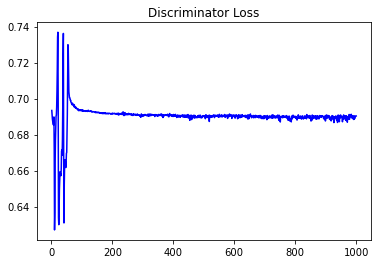

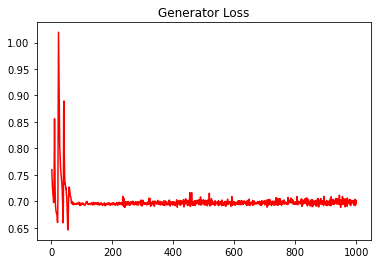

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.34482808809041987


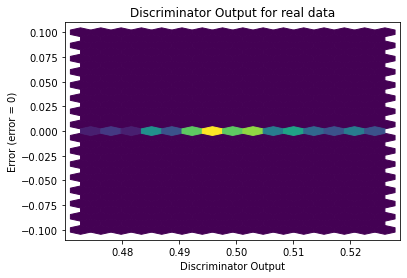

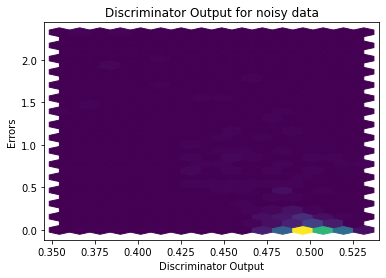

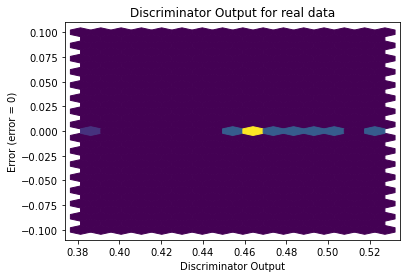

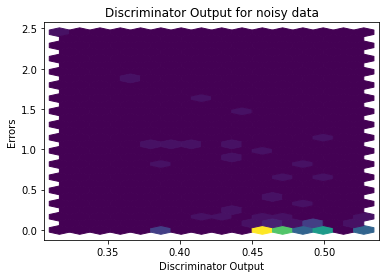

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


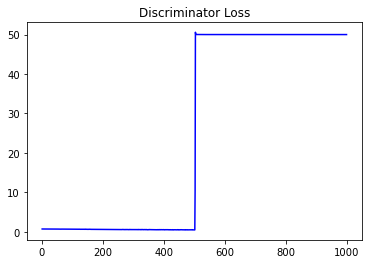

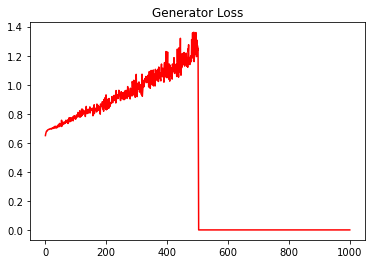

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
722.7954718912307


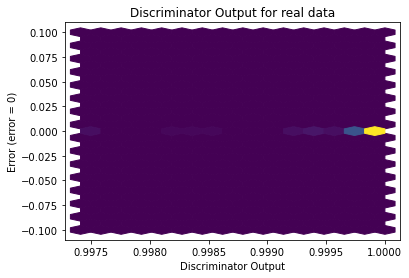

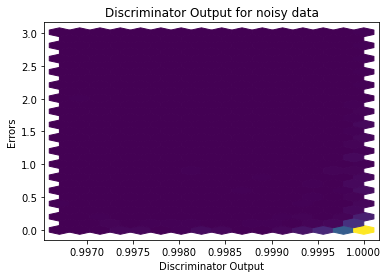

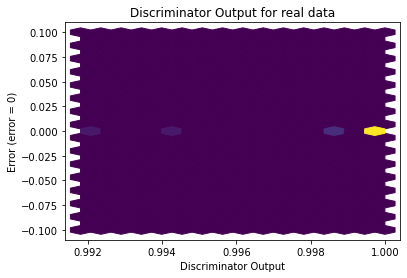

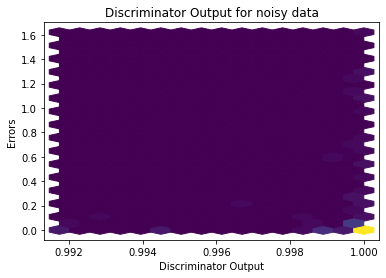

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0599]], requires_grad=True)
